In [ ]:
#%matplotlib notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('190123.tsv',delimiter='\t')
data.head(10)


,Label,A2|hBrain,A3|hUniv-Stratagene,A4|hUniv-DriverMap,A5|hUniv-Clontech,A6|hUniv-BioChain,A7|hUniv-Rare,A8|hWB-Activated,A9|hWB-Disease,A10|hUniv-Immune T10,...,B5|hUniv-Clontech_BSA,B6|hUniv-BioChain_BSA,B7|hUniv-Rare_BSA,B8|hWB-Activated_BSA,B9|hWB-Disease_BSA,B10|hUniv-Immune T10_BSA,B11|hHemat System 3_BSA,B12|Neg Control_BSA,undetermined,ambiguous
0,2396|A1BG,2,36,0,68,8086,4,0,0,338,...,47,7558,2,0,0,310,1354,0,640,0
1,12342|A1CF,1,265,1,138,4445,218,0,0,187,...,156,6068,285,0,0,257,714,0,515,0
2,10001|A2M,3887,8338,2733,24646,30874,14284,150,827,19066,...,26074,31736,14052,86,1215,17289,45539,0,11872,0
3,8216|A2ML1,32,1,43,118,3,2713,0,1,5,...,175,4,3352,0,0,24,15,0,217,0
4,15932|A3GALT2,0,0,3,2,0,4,2,0,3,...,2,0,4,0,0,0,1,0,0,0
5,12704|A4GALT,88,363,264,1022,153,639,15,157,288,...,1759,274,905,34,369,501,475,2173,458,0
6,10003|A4GNT,1,5,1,5,1,3,5,0,48,...,3,4,4,8,1,28,4,654,24,0
7,2399|AAAS,483,1406,809,589,264,835,214,1068,794,...,762,354,826,235,1694,995,1340,0,671,0
8,2400|AACS,741,647,817,854,133,1166,91,570,413,...,1105,127,1443,158,829,491,324,0,477,0
9,9116|AADAC,3,5,7,58,3767,304,2,2,580,...,56,3156,228,0,1,523,971,0,548,0


In [3]:
dmcounts_df=pd.read_csv('DriverMapCounts.tsv',delimiter='\t')
dmcounts_df=dmcounts_df.set_index('target')
dmcounts_df=dmcounts_df[['A2','B2','A3','B3','A4','B4','A12','B12']]
dmcounts_df.head()

,A2,B2,A3,B3,A4,B4,A12,B12
target,,,,,,,,
14266|CENPU,7.0,14.0,1215.0,1247.0,1826.0,1936.0,0.0,0.0
13331|PEX14,336.0,432.0,348.0,331.0,227.0,316.0,0.0,0.0
6630|RAD52,155.0,225.0,241.0,343.0,105.0,194.0,0.0,139.0
16802|CLYBL,525.0,365.0,522.0,415.0,167.0,164.0,1379.0,1595.0
6645|RANBP1,192.0,131.0,743.0,407.0,510.0,334.0,0.0,35.0


In [4]:
rna_vs_dm_df=pd.read_csv('RNAseq-vs-DriverMap.txt',delimiter='\t')
rna_vs_dm_df=rna_vs_dm_df.set_index('gene.symbol')
clean_rna_vs_dm_df=rna_vs_dm_df.drop(['NewAmplicon','CellectID','EntrezGeneID','AmplLength','description_v85',
                                      'Current_Refseq_RNA'],axis=1)
clean_rna_vs_dm_df.head()

,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9,A2_hBrain,...,B3_hUniv.Stratagene_BSA,B4_hUniv.DriverMap_BSA,B5_hUniv.Clontech_BSA,B6_hUniv.BioChain_BSA,B7_hUniv.Rare_BSA,B8_hWB.Activated_BSA,B9_hWB.Disease_BSA,B10_hUniv.Immune.T10_BSA,B11_hHemat.System.3_BSA,B12_Neg.Control_BSA
gene.symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,17,33,19,32,5680,8,6,24,297,2,...,40,0,47,7353,2,0,0,303,1327,0
A1CF,0,195,0,70,5495,132,0,0,349,1,...,298,0,153,5885,276,0,0,253,696,0
A2M,1286,2433,1038,6061,14848,3240,20,172,7862,3748,...,9141,3195,25181,30614,13537,82,1161,16663,43947,0
A2ML1,16,2,46,50,1,1244,1,0,31,31,...,1,50,170,4,3283,0,0,24,14,0
A3GALT2,0,0,0,0,2,0,1,0,1,0,...,1,0,1,0,4,0,0,0,1,0


In [5]:

clean_rna_vs_dm_df=clean_rna_vs_dm_df.rename(columns={'A2_hBrain':'A2',                                                      'A3_hUniv.Stratagene':'A3','A4_hUniv.DriverMap':'A4',
                                   'A5_hUniv.Clontech':'A5','A6_hUniv.BioChain':'A6', 'A7_hUniv.Rare':'A7',
                                   'A8_hWB.Activated':'A8','A9_hWB.Disease':'A9','A10_hUniv.Immune.T10':'A10',
                                   'A11_hHemat.System.3':'A11','A12_Neg.Control.B67':'A12-NEG',
                                   'B2_hBrain':'B2','B3_hUniv.Stratagene_BSA':'B3','B4_hUniv.DriverMap_BSA':'B4',
                                   'B5_hUniv.Clontech_BSA':'B5','B6_hUniv.BioChain_BSA':'B6','B7_hUniv.Rare_BSA':'B7',
                                   'B8_hWB.Activated_BSA':'B8','B9_hWB.Disease_BSA':'B9', 'B10_hUniv.Immune.T10_BSA':'B10',
                                   'B11_hHemat.System.3_BSA':'B11', 'B12_Neg.Control_BSA':'B12-NEG'})
clean_rna_vs_dm_df.head()

,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9,A2,...,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12-NEG
gene.symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,17,33,19,32,5680,8,6,24,297,2,...,40,0,47,7353,2,0,0,303,1327,0
A1CF,0,195,0,70,5495,132,0,0,349,1,...,298,0,153,5885,276,0,0,253,696,0
A2M,1286,2433,1038,6061,14848,3240,20,172,7862,3748,...,9141,3195,25181,30614,13537,82,1161,16663,43947,0
A2ML1,16,2,46,50,1,1244,1,0,31,31,...,1,50,170,4,3283,0,0,24,14,0
A3GALT2,0,0,0,0,2,0,1,0,1,0,...,1,0,1,0,4,0,0,0,1,0


In [6]:
test=clean_rna_vs_dm_df.iloc[0,9:]
test=test.reset_index()
test

,index,A1BG
0,A2,2
1,A3,35
2,A4,0
3,A5,63
4,A6,7842
5,A7,4
6,A8,0
7,A9,0
8,A10,330
9,A11,1326


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text xticklabel objects>)

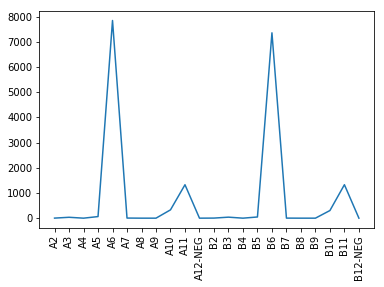

In [7]:
plt.plot(test['index'], test['A1BG'])
plt.xticks(rotation=90)


In [8]:
test1=test.iloc[0:10,:]
test2=test.iloc[11:21,:]

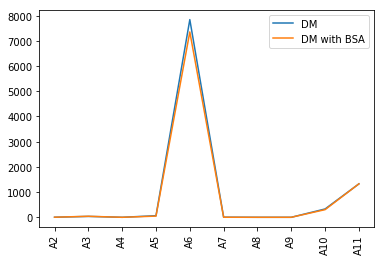

In [9]:
plt.plot(test1['index'],test1['A1BG'], label='DM')
plt.plot(test1['index'],test2['A1BG'], label='DM with BSA')
plt.xticks(rotation=90)
plt.legend(loc='best')